# Name: V Raghav Anand

# Register Number: 19BCE1415

# Machine Learning Lab (CSE4020)

# Faculty: Prof. Abdul Quadir MD

# K MEANS AND K MODES CLUSTERING

In [1]:
import numpy as np
import random
import math
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import plotly.express as px
import plotly.graph_objs as go
import plotly
import plotly.io as pio
import plotly.offline as pyo
from sklearn.datasets import make_blobs
import pandas as pd
import kmodes

## Implementing K Means by hardcoding method

### Defining the required functions

In [2]:
def dist(a,b):
    return math.sqrt(np.sum(np.square(a-b)))

def var(clus,c,arr):
    vari=0
    for i in range(len(c)):
        vari+=np.var(np.array([dist(c[i],j) for j in arr[clus==i].tolist()],dtype=float))
    return vari

### Functions for plotting the graphs

In [3]:
def plot2d(c,clus,arr):
    if(len(c)==0):
        length=len(set(clus.tolist()))
    else:
        length=len(c)
    color = np.array(cm.rainbow(np.linspace(0, 0.9, length)))
    for i in range(length):
        if(len(c)>0):
            plt.scatter(c[i][0], c[i][1], color=color[i],marker='x',label='Centroid:'+str(i),s=100)
        l=arr[clus==i].tolist()
        plt.scatter([k[0] for k in l],[k[1] for k in l],color=color[i],label='Cluster:'+str(i))
    plt.title('Clusters')
    plt.legend()
    plt.show()
    
def plot3d(c,clus,arr):
    data=[]
    x,y,z=[],[],[]
    [(x.append(i[0]),y.append(i[1]),z.append(i[2])) for i in arr.tolist()]
    data.append(go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(color=clus,showscale=True),name="Clusters"))
    x,y,z=[],[],[]
    [(x.append(i[0]),y.append(i[1]),z.append(i[2])) for i in c.tolist()]
    data.append(go.Scatter3d(x=x,y=y,z=z,mode='markers',marker = dict(color = "black"),name='Centroids',marker_symbol="diamond", marker_size=10))
    fig = go.Figure(data=data)
    fig.update_layout(scene = dict(xaxis_title='x',yaxis_title='y',zaxis_title='z'))
    fig.update_traces(showlegend=True)
    fig.show()

In [4]:
def plotvar(varx):
    plt.scatter(varx.index(min(varx)),min(varx),label='Best cluster',color='red',s=100)
    plt.plot(varx,marker='x')
    plt.xlabel('Iteration')
    plt.ylabel('Variance')
    plt.title('Variance of Cluster vs. Iteration')
    plt.legend()
    plt.show()

### Function that implements K Means

In [5]:
def Kmeans(N,arr,it,plotv=0,plotd=0,*c):
    varx=[]
    plot=[None,plot2d,plot3d][plotd]
    c=np.array(c,dtype=float)
    if(len(c)==0):
        c=np.array(random.sample(arr.tolist(),N),dtype=float)
    clus=np.array([],dtype=int)
    for i in range(len(arr)):
        les=sys.maxsize
        clus=np.append(clus,0)
        for j in range(N):
            dis=dist(c[j],arr[i])
            if(les>dis):
                les,clus[-1]=dis,j
    print("Initial Centroids: ",c)
    varx.append(var(clus,c,arr))
    print("Initial Variance: ",varx[-1])
    print()
    for j in range(N):
            c[j]=np.average(arr[clus==j],axis=0)
    print("New Centroids: ",c)
    varx.append(var(clus,c,arr))
    print("New Variance: ",varx[-1])
    print()
    print("\nPlot after taking random centers:")
    plot(c,clus,arr)
    for o in range(it-1):
        f=1
        for i in range(len(arr)):
            les,bef=sys.maxsize,clus[i]
            for j in range(N):
                dis=dist(c[j],arr[i])
                if(les>=dis):
                    les,clus[i]=dis,j
            if(bef!=clus[i]):
                f=0
        if(f):
            print("No change detected in cluster centroid")
            break
        for j in range(N):
            c[j]=np.average(arr[clus==j],axis=0)
        print("Iteration:",o," Centroid:",c)
        varx.append(var(clus,c,arr))
        print("Variance: ",varx[-1])
        plot(c,clus,arr)
    if(plotv):
        plotvar(varx)
    print("Final Centroids:",c)
    print("Variance:",varx[-1])
    plot(c,clus,arr)
    d=c.copy()
    c=[]
    return clus,d

## Taking a dataset for implementing K Means clustering

In [6]:
arr = make_blobs(n_samples=40,n_features=2, centers=3, shuffle=False, random_state=50,cluster_std=1.0)
arr[0]

array([[ 1.30397903, -5.91507005],
       [-0.8884363 , -4.36807018],
       [-1.39025969, -6.76581681],
       [ 0.01837055, -4.5761442 ],
       [ 0.58876987, -5.7729031 ],
       [-1.10549315, -3.83942962],
       [ 3.20610826, -4.45056745],
       [ 0.01589917, -4.69555252],
       [-0.50192294, -5.29022209],
       [-0.52020154, -5.59905297],
       [ 0.03156439, -5.15286854],
       [-0.38922908, -3.72743059],
       [-0.25773373, -4.74803119],
       [ 0.98724242, -4.09992921],
       [-6.25950319, -1.58697418],
       [-4.13699985, -1.70993721],
       [-5.20523201, -0.70012064],
       [-5.51493869, -1.69764781],
       [-5.09093784, -1.33036375],
       [-4.03315957, -3.57959109],
       [-6.5568737 , -2.29239661],
       [-5.24937995, -1.69487411],
       [-4.20630616, -3.24125787],
       [-5.68373814, -2.1122372 ],
       [-2.18526653, -3.56479031],
       [-4.79454359, -1.5487151 ],
       [-4.07485602, -2.021896  ],
       [-2.61825341, 10.20968402],
       [-2.36658334,

## Visualizing the clusters by taking K=3 and maximum limit for iterations as 10

Initial Centroids:  [[-4.79454359 -1.5487151 ]
 [-2.23145433 10.1832982 ]
 [-5.51493869 -1.69764781]]
Initial Variance:  7.657080609564694

New Centroids:  [[-1.4831202  -3.9408073 ]
 [-1.98882425  9.4293944 ]
 [-5.85288674 -1.87682598]]
New Variance:  2.2842435794912843


Plot after taking random centers:


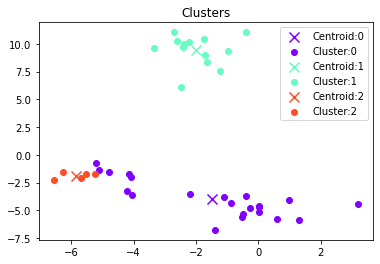

Iteration: 0  Centroid: [[-0.07244062 -4.83772526]
 [-1.98882425  9.4293944 ]
 [-5.06720573 -1.95966763]]
Variance:  1.634031388912178


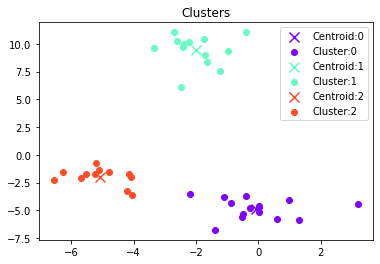

No change detected in cluster centroid


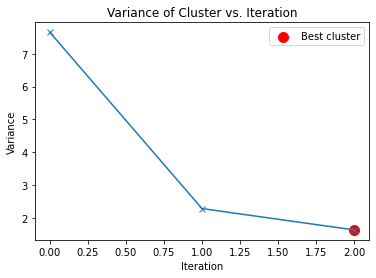

Final Centroids: [[-0.07244062 -4.83772526]
 [-1.98882425  9.4293944 ]
 [-5.06720573 -1.95966763]]
Variance: 1.634031388912178


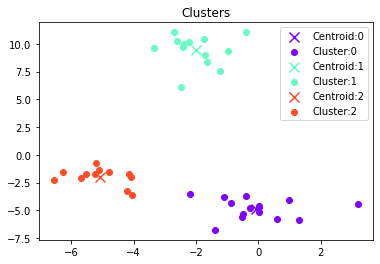

In [7]:
k=Kmeans(3,arr[0],10,plotv=1,plotd=1)

## Visualizing the clusters by taking K=4

Initial Centroids:  [[ 0.01837055 -4.5761442 ]
 [-0.52020154 -5.59905297]
 [-2.18526653 -3.56479031]
 [-3.34465266  9.66083827]]
Initial Variance:  4.061949770162872

New Centroids:  [[ 0.34047321 -4.47732423]
 [-0.10392705 -5.86861301]
 [-4.57837346 -2.20858796]
 [-1.98882425  9.4293944 ]]
New Variance:  2.1421649535214735


Plot after taking random centers:


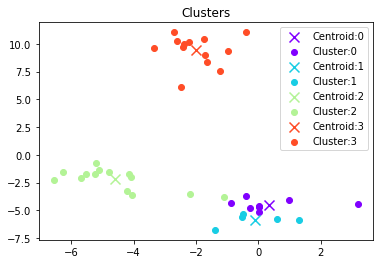

Iteration: 0  Centroid: [[-0.06650427 -4.22999392]
 [-0.08134515 -5.74932226]
 [-5.06720573 -1.95966763]
 [-1.98882425  9.4293944 ]]
Variance:  1.8873278795031232


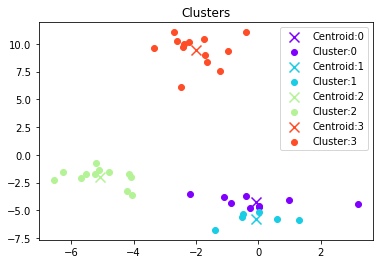

No change detected in cluster centroid


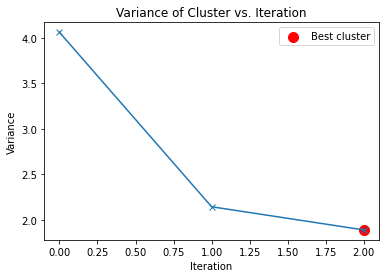

Final Centroids: [[-0.06650427 -4.22999392]
 [-0.08134515 -5.74932226]
 [-5.06720573 -1.95966763]
 [-1.98882425  9.4293944 ]]
Variance: 1.8873278795031232


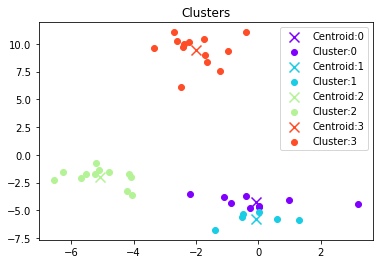

In [8]:
k=Kmeans(4,arr[0],10,plotv=1,plotd=1)

## Visualizing the clusters by taking K=5

Initial Centroids:  [[-4.03315957 -3.57959109]
 [ 1.30397903 -5.91507005]
 [-0.52020154 -5.59905297]
 [ 0.58876987 -5.7729031 ]
 [-0.50192294 -5.29022209]]
Initial Variance:  35.5205899738992

New Centroids:  [[-3.41717117  3.6731279 ]
 [ 2.25504364 -5.18281875]
 [-0.95523061 -6.18243489]
 [ 0.78800615 -4.93641615]
 [-0.38462264 -4.54971862]]
New Variance:  1.2337494758301284


Plot after taking random centers:


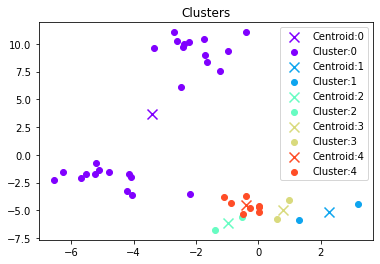

Iteration: 0  Centroid: [[-2.81913688  6.89806005]
 [ 3.20610826 -4.45056745]
 [-0.95523061 -6.18243489]
 [ 0.95999711 -5.26263412]
 [-2.5881238  -3.42137908]]
Variance:  7.559456950562932


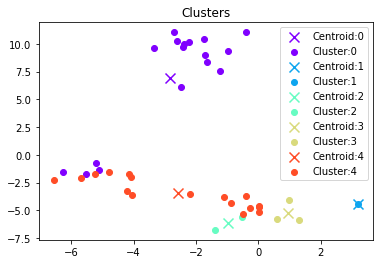

Iteration: 1  Centroid: [[-1.98882425  9.4293944 ]
 [ 3.20610826 -4.45056745]
 [-0.82520512 -5.50579051]
 [ 0.28735783 -4.83599118]
 [-4.57837346 -2.20858796]]
Variance:  1.7765991738833669


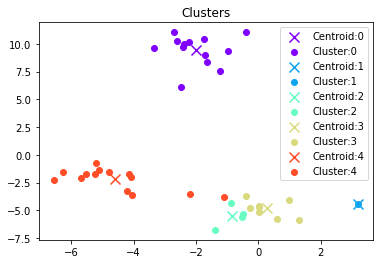

Iteration: 2  Centroid: [[-1.98882425  9.4293944 ]
 [ 3.20610826 -4.45056745]
 [-1.09859669 -4.90456366]
 [ 0.28735783 -4.83599118]
 [-5.06720573 -1.95966763]]
Variance:  1.2680565059925855


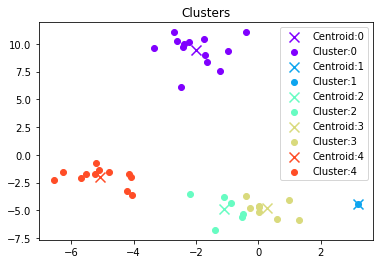

No change detected in cluster centroid


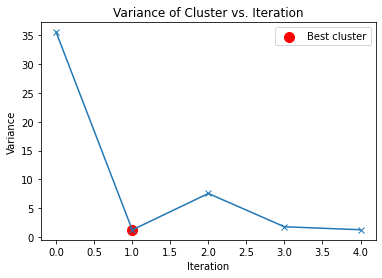

Final Centroids: [[-1.98882425  9.4293944 ]
 [ 3.20610826 -4.45056745]
 [-1.09859669 -4.90456366]
 [ 0.28735783 -4.83599118]
 [-5.06720573 -1.95966763]]
Variance: 1.2680565059925855


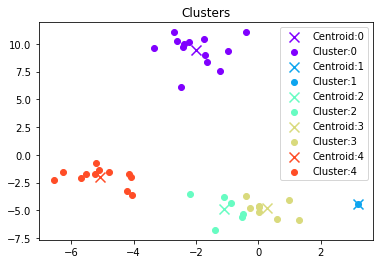

In [9]:
k=Kmeans(5,arr[0],10,plotv=1,plotd=1)

## Implementing K Means clusering using sklearn package and repeating the same visualizations

In [10]:
from sklearn.cluster import KMeans

## K=3

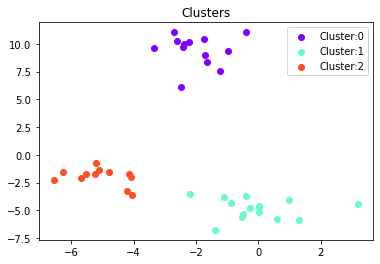

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(arr[0])
prediction = kmeans.predict(arr[0])
plot2d(np.array([]),prediction,arr[0])

## K=4

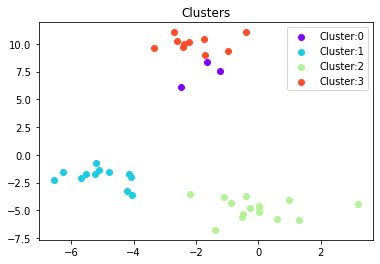

In [12]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(arr[0])
prediction = kmeans.predict(arr[0])
plot2d(np.array([]),prediction,arr[0])

## K=5

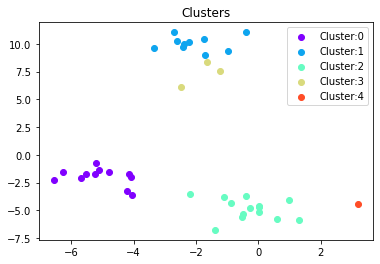

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(arr[0])
prediction = kmeans.predict(arr[0])
plot2d(np.array([]),prediction,arr[0])

## Implementing K Modes for the given dataset and forming the clusters

In [14]:
from kmodes.kmodes import KModes as kmodes

In [15]:
c1 = np.array(["blonde", "brunette", "red", "black", "brunette", "black", "red", "black"])
c2 = np.array(["amber", "grey", "green", "hazel", "amber", "grey", "green", "hazel"])
c3 = np.array(["fair", "brown", "brown", "brown", "fair", "brown", "fair", "fair"])
df = pd.DataFrame({'A1':c1,'A2':c2,'A3':c3})
df

,A1,A2,A3
0,blonde,amber,fair
1,brunette,grey,brown
2,red,green,brown
3,black,hazel,brown
4,brunette,amber,fair
5,black,grey,brown
6,red,green,fair
7,black,hazel,fair


In [16]:
kmode = kmodes(n_clusters=3)
pred = kmode.fit_predict(df)
for i in range(len(set(pred.tolist()))):
    print("Cluster:",i+1)
    print("="*35)
    print(df[pred==i])
    print()

Cluster: 1
      A1     A2     A3
2    red  green  brown
3  black  hazel  brown
5  black   grey  brown
7  black  hazel   fair

Cluster: 2
         A1     A2    A3
0    blonde  amber  fair
4  brunette  amber  fair
6       red  green  fair

Cluster: 3
         A1    A2     A3
1  brunette  grey  brown

